<center>

# Capítulo 4: Características de Sistemas de Controle com Realimentação

**Aluno(a):** Geovana Stefani Lopes Bezerra

**Disciplina:** Controle e Automação  
**Professor:** Moacy Pereira da Silva  
**Semestre:** 2025.2

Este notebook faz parte do estudo dirigido da disciplina de Controle e Automação com foco em aplicações de Indústria 4.0.  
O capítulo 4 aborda os conceitos fundamentais de realimentação, efeitos em sistemas lineares e aplicações práticas em processos industriais modernos.

</center>



## 4.1 Introdução

Sistemas de controle podem operar em **malha aberta** ou **malha fechada**. Em sistemas de malha aberta, a saída do processo não é medida nem utilizada para ajustar a entrada, o que limita a precisão e torna o sistema sensível a perturbações e variações nos parâmetros.  

Sistemas de **malha fechada** (com realimentação) utilizam a saída medida para calcular o **erro** em relação à referência \( e(t) = r(t) - y(t) \), permitindo ao controlador ajustar a entrada de forma a reduzir o erro, melhorar a estabilidade e aumentar a robustez do sistema.  

A realimentação negativa é o arranjo predominante, pois reduz erros e ajuda a manter o sistema estável. Contudo, há custos envolvidos, como complexidade adicional, necessidade de sensores e risco de instabilidade se o ganho for mal ajustado.



## 4.2 Análise do Sinal-Erro

O **erro** é a medida central de desempenho em sistemas de controle. Sistemas de malha fechada utilizam o erro para ajustar a entrada e minimizar diferenças entre a referência e a saída.  

O erro em malha fechada depende do **ganho do controlador** e da função de transferência do processo. Quanto maior o loop-gain \( L(s) = G_c(s)G_p(s) \), maior a capacidade do sistema de reduzir o erro frente a mudanças na referência ou perturbações.  

O diagrama de blocos pode ser expandido para incluir perturbações externas e ruído de medição, preparando o sistema para situações reais industriais.



## 4.3 Sensibilidade a Variações de Parâmetros

A realimentação reduz a **sensibilidade** do sistema a variações nos parâmetros do processo, como ganho ou constante de tempo. Isso é importante em ambientes industriais, onde desgaste, envelhecimento ou alterações de carga podem modificar o comportamento do sistema.  

A função de sensibilidade:
$$
S(s) = \frac{1}{1 + L(s)}
$$

Mostra que, quanto maior o loop-gain \( L(s) \), menor será a sensibilidade a variações, garantindo desempenho consistente. No entanto, ganhos muito altos podem causar instabilidade ou amplificação de ruído.



## 4.4 Sinais de Perturbação

Sistemas reais estão sujeitos a **perturbações externas** \(d(t)\) e **ruído de medição** \(n(t)\). A realimentação ajuda a compensar essas influências, reduzindo o efeito das perturbações sobre a saída.  

Funções de sensibilidade e funções complementares determinam o trade-off entre rejeição de perturbações e atenuação de ruído. Projetos industriais devem equilibrar essas respostas para garantir operação estável e segura.



## 4.5 Controle da Resposta Transitória

A realimentação também molda a **resposta transitória** do sistema, afetando tempo de subida, tempo de acomodação, overshoot e amortecimento. Sistemas de 2ª ordem com função de transferência:

$$
H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}
$$

são usados para analisar o efeito de polos dominantes. Ganhos maiores aceleram a resposta, mas podem gerar overshoot ou instabilidade se o amortecimento for baixo ou houver atrasos. Isso é crítico em processos industriais que exigem precisão e velocidade de resposta.



## 4.6 Erro em Regime Permanente

O **erro em regime permanente** \(e_{ss} = \lim_{t\to\infty} e(t)\) indica o desvio residual entre saída e referência após o decaimento das transientes. Depende do tipo de sistema (número de integradores) e da natureza da entrada (degrau, rampa, parabólica).  

Controladores com ação integrativa, como o PI, eliminam o erro em regime permanente para entradas degrau, garantindo precisão em aplicações industriais.



## 4.7 Custo da Realimentação

Apesar de suas vantagens, a realimentação aumenta a **complexidade do sistema**, exigindo sensores, atuadores e controladores adicionais. Há risco de instabilidade, amplificação de ruído e maior custo de manutenção.  

O designer deve equilibrar benefícios e custos, definindo o nível adequado de realimentação para o desempenho e segurança do processo industrial.



# Simulação 1: Sistema de 2ª Ordem (Resposta Transitória)

Esta simulação ilustra o efeito do **coeficiente de amortecimento ζ** sobre overshoot e tempo de acomodação, conectando-se à seção 4.5.


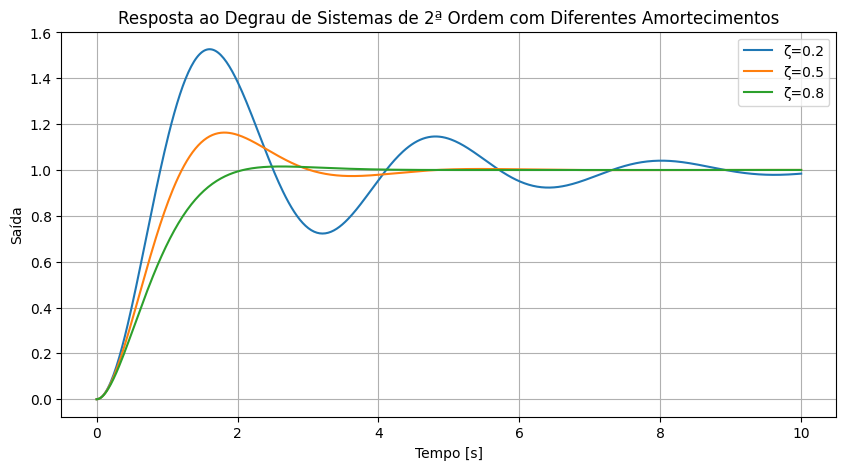

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

# Parâmetros
wn = 2.0
zetas = [0.2, 0.5, 0.8]

t = np.linspace(0, 10, 500)
plt.figure(figsize=(10,5))

for zeta in zetas:
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    system = lti(num, den)
    t, y = step(system, T=t)
    plt.plot(t, y, label=f'ζ={zeta}')

plt.title('Resposta ao Degrau de Sistemas de 2ª Ordem com Diferentes Amortecimentos')
plt.xlabel('Tempo [s]')
plt.ylabel('Saída')
plt.grid(True)
plt.legend()
plt.show()



# Simulação 2: Controle de Nível com PI

Demonstra a eliminação do **erro em regime permanente** com um controlador PI, conectando-se às seções 4.2 e 4.6.


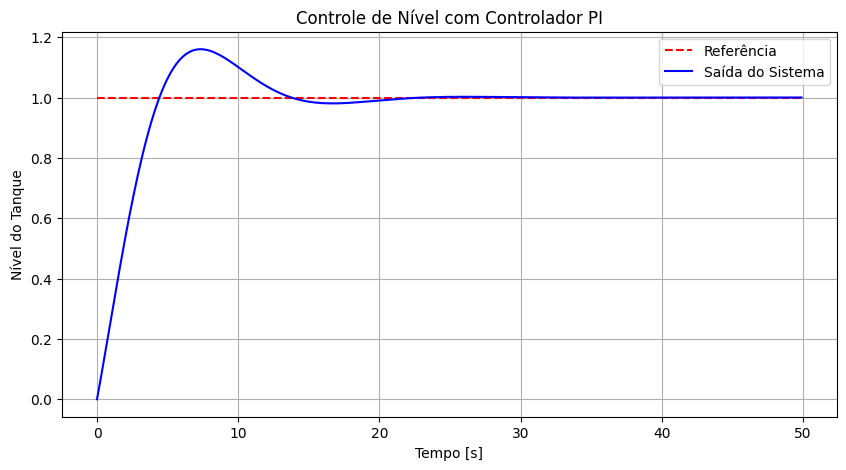

In [2]:

# Sistema do tanque
K = 1.0
tau = 5.0

# Controlador PI
Kp = 1.2
Ki = 0.8

# Simulação discreta
dt = 0.1
t = np.arange(0, 50, dt)
r = np.ones_like(t) * 1.0
y = np.zeros_like(t)
u = np.zeros_like(t)
e_int = 0

for i in range(1, len(t)):
    e = r[i] - y[i-1]
    e_int += e * dt
    u[i] = Kp*e + Ki*e_int
    y[i] = y[i-1] + dt*( -y[i-1]/tau + K*u[i]/tau )

plt.figure(figsize=(10,5))
plt.plot(t, r, 'r--', label='Referência')
plt.plot(t, y, 'b', label='Saída do Sistema')
plt.title('Controle de Nível com Controlador PI')
plt.xlabel('Tempo [s]')
plt.ylabel('Nível do Tanque')
plt.grid(True)
plt.legend()
plt.show()



# Simulação 3: Efeito de Perturbações

Mostra como a realimentação reage a **perturbações externas**, conectando-se à seção 4.4.


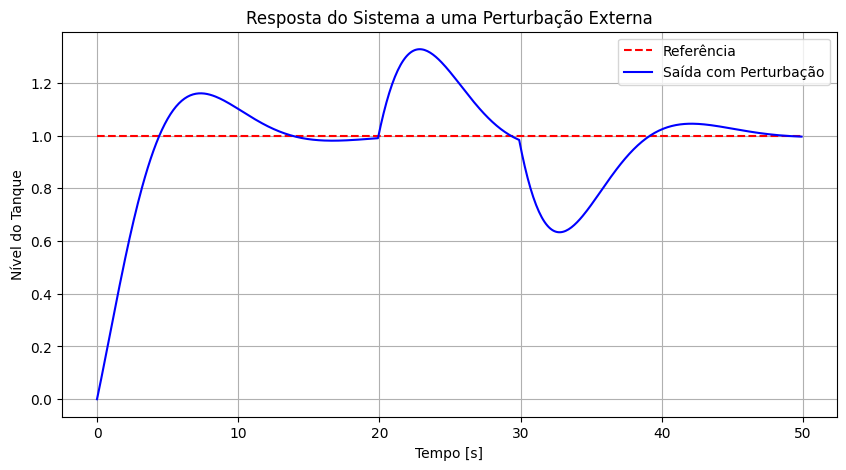

In [3]:

# Perturbação
disturbance = np.zeros_like(t)
disturbance[200:300] = 0.5

y_dist = np.zeros_like(t)
e_int = 0

for i in range(1, len(t)):
    e = r[i] - y_dist[i-1]
    e_int += e * dt
    u[i] = Kp*e + Ki*e_int
    y_dist[i] = y_dist[i-1] + dt*( -y_dist[i-1]/tau + K*u[i]/tau + disturbance[i]*0.5 )

plt.figure(figsize=(10,5))
plt.plot(t, r, 'r--', label='Referência')
plt.plot(t, y_dist, 'b', label='Saída com Perturbação')
plt.title('Resposta do Sistema a uma Perturbação Externa')
plt.xlabel('Tempo [s]')
plt.ylabel('Nível do Tanque')
plt.grid(True)
plt.legend()
plt.show()


# Resultados e Discussão

## Sistema de 2ª Ordem

- A **resposta ao degrau** mostra que o coeficiente de amortecimento \( \zeta \) impacta diretamente o **overshoot e tempo de acomodação**:  
  - ζ = 0.2 → pouca amortecimento, muitas oscilações.  
  - ζ = 0.5 → amortecimento moderado, resposta equilibrada.  
  - ζ = 0.8 → superamortecido, resposta lenta e sem oscilações.  
- Demonstra a importância do **projeto do controlador** para garantir resposta rápida e estável.

## Controle de Nível com PI

- O **controlador PI** consegue seguir a referência com **erro praticamente zero** em regime permanente.  
- A curva mostra a importância da **realimentação proporcional e integral**:  
  - Proporcional corrige rapidamente os erros grandes.  
  - Integral elimina o erro residual ao longo do tempo.  
- Em processos industriais reais, o ajuste dos parâmetros \(K_p\) e \(K_i\) é crítico para evitar **oscilações ou atraso excessivo**.

## Rejeição de Perturbações

- Quando adicionamos uma **perturbação externa**, a realimentação compensou rapidamente a alteração, mantendo a saída próxima da referência.  
- Demonstra a **rejeição de distúrbios**, essencial para processos contínuos e sensíveis em indústria.  

## Conexão com Indústria 4.0

- **APC (Advanced Process Control)**: controle de nível é um exemplo direto de aplicação em processos químicos ou industriais.  
- **Digital Twin**: simulações permitem testar e ajustar controladores antes de aplicar no sistema real.  
- **IIoT e Cloud**: sensores podem enviar dados em tempo real para monitoramento, análise e otimização remota.  



# Conclusão

O capítulo 4 demonstra a importância da **realimentação negativa** para sistemas de controle: redução de erro em regime permanente, rejeição de perturbações e controle da resposta transitória.  

As simulações mostram na prática como parâmetros como amortecimento, ganho e integral afetam o comportamento do sistema.  

Em contexto de **Indústria 4.0**, esses conceitos são aplicáveis em APC, Digital Twin, IIoT e controle em tempo real, integrando teoria e prática industrial.
